# Analytical Design of a PID Compensator

This section presents an analytical procedure for PID compensator design. It is based on Section 7.11 of Phillips and Harbor *Feedback_ Control Systems*, Prentice Hall, 1988<sup>[1]</sup>. 

The compensator transfer function is assumed to be

$$\begin{equation}D(s)=\frac{K_Ds^2 + K_\mathrm{prop}\;s+K_I}{s}\end{equation}$$                        
                                                                    
where $K_{\mathrm{prop}}$ is the proportional gain, $K_D$is the derivative gain and $K_I$ is the integral gain. In this procedure we choose the PID gain parameters such that, given a desired location for one of the closed-loop poles $s_1$, the equation

$$\begin{equation}\left.D(s)G(s)H(s)\right|_{s=s_1}=-1\end{equation}$$                                                                                                       
is satisfied; that is we are designing a compensator that places a root 
of the closed-loop characteristic equation at $s=s_1$.

The design proceeds as follows. First we express the desired closed loop 
pole position

$$\begin{equation}s_1=|s_1|e^{j\psi}\end{equation}$$                                                                                                                                                              
and

$$\begin{equation}G(s_1)H(s_1)=\left|G(s_1)H(s_1)\right|e^{j\psi}\end{equation}$$                                                                               
Then the design equations (derived in Appendix B of Phillips and Harbor, 1988) are

$$\begin{equation}K_{\mathrm{prop}}=-\frac{\sin(\beta - \psi)}{\left|G(s_1)H(s_1)\right|\sin\beta}-\frac{2K_I\cos\beta}{|s_1|}\end{equation}$$                                                                 

$$\begin{equation}K_{\mathrm{prop}}=-\frac{\sin\psi}{|s_1|\left|G(s_1)H(s_1)\right|\sin\beta}-\frac{K_I}{|s_1|^2}\end{equation}$$                                                                         

Since there are three unknowns and only two relationships that must be satisfied, one of the gains may be chosen to satisfy a different design specification, such as choosing $K_I$ to achieve a certain steady-state response. These equations can also be used for PI and P+D controllers by setting the appropriate gain 
to zero. We now illustrate the design procedure with an example.

## Example

*Definitions (change these to change design)*

The plant transfer function is

$$G(s)=\frac{1}{(s+1)(5s+1)}$$

In [1]:
imatlab_export_fig('print-svg')  % Static svg figures.

In [2]:
G = tf(1,conv([1 1],[5 1]));  

The feedback transfer function is  $H(s)=1$:

In [3]:
H=tf(1,1); 

So $G(s)H(s)$ is:

In [4]:
GH=G*H 


GH =
 
         1
  ---------------
  5 s^2 + 6 s + 1
 
Continuous-time transfer function.



The root locus of the uncompensated system is:

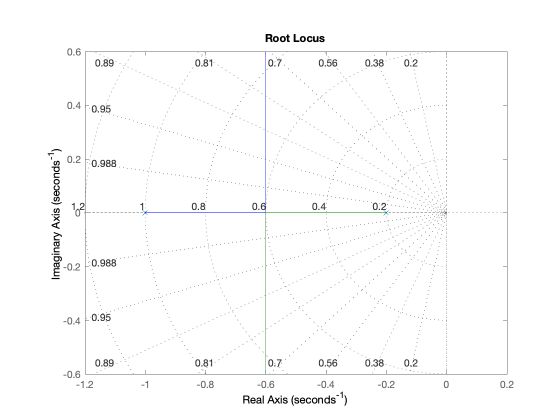

In [5]:
clf, sgrid(1/sqrt(2),0.25:0.25:2), hold on, rlocus(GH),hold off 

From the root locus diagram, it is clear that for ideal damping the natural 
frequency of the closed-loop poles would be about 0.9 rad/s with a settling 
time of:

$T_s=\frac{4.6}{\zeta\omega_n}=\frac{4.6}{5/8}=7.36$ s

Suppose we wish to half the settling time then we need to double the natural 
frequency to  $\omega_n = 2$rad/s. 

That is:

In [6]:
zeta = 1/sqrt(2); wn=2;  
s1 = -zeta*wn+j*wn*sqrt(1-zeta^2)  


s1 =

  -1.4142 + 1.4142i



The steady state error of the uncompensated type 0 system is:

$$\frac{1}{1+\left.G(s)H(s)\right|_{s=0}}=\frac{1}{1+\left.\frac{1}{(5s+1)(s+1)}\right|_{s=0}}=\frac{1}{2}$$   

For the compensated system, which is type 1:

$$K_v=s\left.D(s)G(s)H(s)\right|_{s=0}=\left.\frac{s\left(K_D\,s^s+K_{\mathrm{prod}}\,s+K_I\right)}{s}\right|_{s=0}=K_I$$                     

So if we want a steady-state _velocity _error of 20% we need 

In [7]:
Ki=20; 

## Calculations

Having set up your problem, you shouldn?t need to change these commands

Polar form of $s_1$

In [8]:
m_s1=abs(s1),  p_s1 = angle(s1)*180/pi % degrees  


m_s1 =

     2


p_s1 =

   135



Transfer function evaluated at $s_1$is $G(s_1)H(s_1)$in polar form:

In [9]:
[numGH,denGH] = tfdata(GH,'v');
GHs1=polyval(numGH,s1)/polyval(denGH,s1)   


GHs1 =

  -0.0397 + 0.0610i



Magnitude:

In [10]:
mGHs1=abs(GHs1) 


mGHs1 =

    0.0728



Phase<sup>2</sup>:

In [11]:
pGHs1=-angle(GHs1)*180/pi - 90 % degrees


pGHs1 =

 -213.0264



Hence:

In [12]:
beta = p_s1*pi/180; psi = pGHs1*pi/180;  % radians

From (5) and (6)

In [13]:
Kprop = (-sin(beta+psi))/(mGHs1*sin(beta)) - (2*Ki*cos(beta)/m_s1)  


Kprop =

   33.1421



In [14]:
Kd = (sin(psi)/(m_s1*mGHs1*sin(beta))) + Ki/(m_s1^2)  


Kd =

   10.2929



Compensator is therefore given by

In [15]:
D = tf([Kd, Kprop, Ki],[1, 0]) 


D =
 
  10.29 s^2 + 33.14 s + 20
  ------------------------
             s
 
Continuous-time transfer function.



## Evaluation of Design

Open loop transfer function:

In [16]:
Go=D*GH  


Go =
 
  10.29 s^2 + 33.14 s + 20
  ------------------------
     5 s^3 + 6 s^2 + s
 
Continuous-time transfer function.



### Root locus:

rlocus(Go) 

### Closed-loop transfer function:

In [17]:
DG = D*G  
Gc = feedback(DG,H)  


DG =
 
  10.29 s^2 + 33.14 s + 20
  ------------------------
     5 s^3 + 6 s^2 + s
 
Continuous-time transfer function.


Gc =
 
      10.29 s^2 + 33.14 s + 20
  --------------------------------
  5 s^3 + 16.29 s^2 + 34.14 s + 20
 
Continuous-time transfer function.



### Step response:

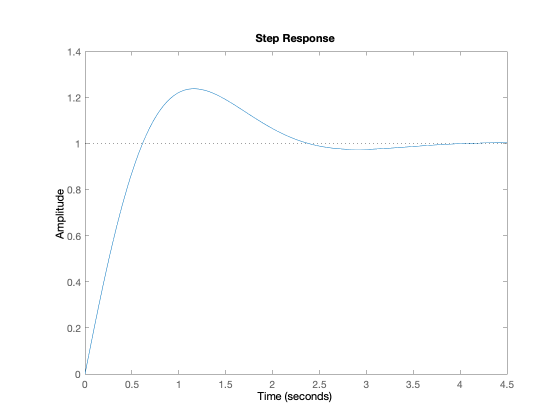

In [18]:
step(Gc) 

## Footnotes

[1] The proofs of the formulae given are derived in Appendix B of this text.

[2] You must be careful with angles when using packages like MATLAB, and indeed pocket calculators. It is nearly always beneficial to have a sketch so that you can correct the results. In this case a correction of $-90^\circ$ 
was needed.

## Resources

An executable version of this document is available to download as the MATLAB Live Script file [analrloc.mlx](analrloc.mlx).